In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia


 48% 12.0M/24.8M [00:00<00:00, 125MB/s]
100% 24.8M/24.8M [00:00<00:00, 164MB/s]


In [ ]:
!unzip "/content/freshwater-fish-disease-aquaculture-in-south-asia.zip"

Archive:  /content/freshwater-fish-disease-aquaculture-in-south-asia.zip
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (116).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (117).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Tes

In [ ]:
# import os
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image

# # Choose a random class directory
# class_dir = os.path.join(train_path, os.listdir(train_path)[3])  # Assuming first class directory

# # Get list of image files in the chosen class directory
# image_files = [file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))]

# # Choose a random image file
# image_file = os.path.join(class_dir, image_files[0])  # Assuming first image file

# # Load and display the image with higher resolution
# img = image.load_img(image_file, target_size=(300, 300))  # Adjust target_size for higher resolution
# plt.imshow(img)
# plt.axis('off')
# plt.show()


**MOBILE NET**

Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
54/54 [==============================] - 35s 427ms/step - loss: 2.0916 - accuracy: 0.2303 - val_loss: 1.6101 - val_accuracy: 0.3839 - lr: 1.0000e-04
Epoch 2/10
54/54 [==============================] - 22s 411ms/step - loss: 1.6881 - accuracy: 0.3609 - val_loss: 1.4251 - val_accuracy: 0.4911 - lr: 1.0000e-04
Epoch 3/10
54/54 [==============================] - 21s 393ms/step - loss: 1.5173 - accuracy: 0.4472 - val_loss: 1.3151 - val_accuracy: 0.5536 - lr: 1.0000e-04
Epoch 4/10
54/54 [==============================] - 23s 417ms/step - loss: 1.4245 - accuracy: 0.4828 - val_loss: 1.2382 - val_accuracy: 0.5714 - lr: 1.0000e-04
Epoch 5/10
54/54 [==============================] - 21s 390ms/step - loss: 1.3540 - accuracy: 0.5108 - val_loss: 1.1645 - val_accuracy: 0.6027 - lr: 1.0000e-04
Epoch 6/10
54/54 [==============================] - 22

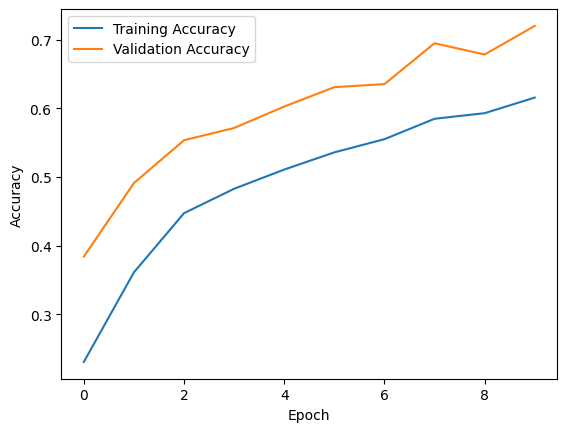

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 10
learning_rate = 0.0001  # Adjusted learning rate

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)  # Add dense layer
x = layers.Dropout(0.5)(x)  # Add dropout layer
predictions = layers.Dense(7, activation='softmax')(x)  # Assuming 6 disease classes

# Create model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**GHOSH NET**

Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
Epoch 1/5
54/54 [==============================] - 35s 414ms/step - loss: 1.8972 - accuracy: 0.2554 - val_loss: 2.1593 - val_accuracy: 0.1369 - lr: 0.0010
Epoch 2/5
54/54 [==============================] - 22s 407ms/step - loss: 1.7661 - accuracy: 0.3155 - val_loss: 2.4595 - val_accuracy: 0.1443 - lr: 0.0010
Epoch 3/5
54/54 [==============================] - 21s 380ms/step - loss: 1.7064 - accuracy: 0.3469 - val_loss: 3.8941 - val_accuracy: 0.1443 - lr: 0.0010
Epoch 4/5
54/54 [==============================] - 22s 405ms/step - loss: 1.6208 - accuracy: 0.3638 - val_loss: 3.6578 - val_accuracy: 0.1458 - lr: 0.0010
Epoch 5/5
54/54 [==============================] - 21s 394ms/step - loss: 1.4581 - accuracy: 0.4536 - val_loss: 3.8859 - val_accuracy: 0.1443 - lr: 1.0000e-04


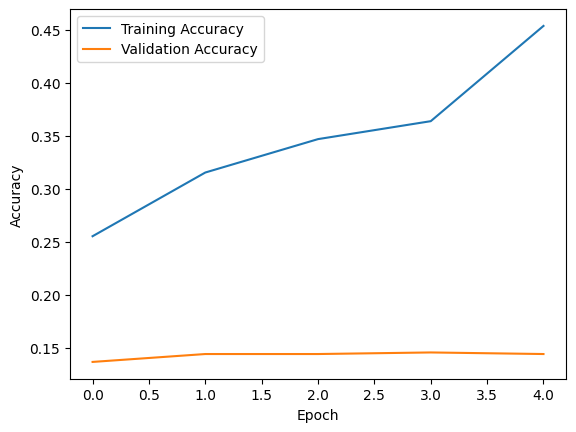

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 5
learning_rate = 0.001

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define Ghost Module
class GhostModule(layers.Layer):
    def __init__(self, out_channels, ratio=2, **kwargs):
        super(GhostModule, self).__init__(**kwargs)
        self.out_channels = out_channels
        self.ratio = ratio
        self.channels_primary = out_channels // ratio
        self.channels_residual = out_channels - self.channels_primary

    def build(self, input_shape):
        self.conv_primary = layers.Conv2D(self.channels_primary, kernel_size=1, padding='same', activation='relu')
        self.conv_residual = layers.Conv2D(self.channels_residual, kernel_size=3, padding='same', activation='relu')
        self.batch_norm = layers.BatchNormalization()

    def call(self, inputs):
        primary = self.conv_primary(inputs)
        residual = self.conv_residual(primary)
        residual = self.batch_norm(residual)
        return tf.concat([primary, residual], axis=-1)

# Define GhostNet model
inputs = layers.Input(shape=(224, 224, 3))
x = layers.Conv2D(16, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
x = GhostModule(16)(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
x = GhostModule(32)(x)
x = GhostModule(32)(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
x = GhostModule(64)(x)
x = GhostModule(64)(x)
x = GhostModule(64)(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
x = GhostModule(128)(x)
x = GhostModule(128)(x)
x = GhostModule(128)(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
x = GhostModule(256)(x)
x = GhostModule(256)(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(7, activation='softmax')(x)

model = models.Model(inputs, x)

# Compile the model with reduced learning rate
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**CNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_dir = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"


# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Decreased rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data with augmentation
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load testing data
test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define the number of classes
num_classes = len(train_dataset.class_indices)

# Define and compile the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Using a lower learning rate for stability
optimizer = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print('Test loss:', loss)
print('Test accuracy:', accuracy)




Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
Epoch 1/10
55/55 [==============================] - 27s 409ms/step - loss: 3.0012 - accuracy: 0.2524 - val_loss: 1.9451 - val_accuracy: 0.2052
Epoch 2/10
55/55 [==============================] - 22s 399ms/step - loss: 1.8670 - accuracy: 0.3051 - val_loss: 2.3172 - val_accuracy: 0.1793
Epoch 3/10
55/55 [==============================] - 22s 387ms/step - loss: 1.7047 - accuracy: 0.3738 - val_loss: 2.6016 - val_accuracy: 0.1463
Epoch 4/10
55/55 [==============================] - 22s 396ms/step - loss: 1.6446 - accuracy: 0.4035 - val_loss: 2.8692 - val_accuracy: 0.1650
Epoch 5/10
55/55 [==============================] - 21s 389ms/step - loss: 1.5843 - accuracy: 0.3984 - val_loss: 2.7725 - val_accuracy: 0.2267
Epoch 6/10
55/55 [==============================] - 21s 376ms/step - loss: 1.5098 - accuracy: 0.4316 - val_loss: 2.3352 - val_accuracy: 0.3357
Epoch 7/10
55/55 [==============================] - 22s 392

**RESNET**

Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
54/54 [==============================] - 70s 637ms/step - loss: 1.5411 - accuracy: 0.4472 - val_loss: 2.6148 - val_accuracy: 0.1443 - lr: 1.0000e-04
Epoch 2/10
54/54 [==============================] - 30s 552ms/step - loss: 0.6967 - accuracy: 0.7627 - val_loss: 3.6466 - val_accuracy: 0.1354 - lr: 1.0000e-04
Epoch 3/10
54/54 [==============================] - 30s 549ms/step - loss: 0.3834 - accuracy: 0.8741 - val_loss: 2.8130 - val_accuracy: 0.1429 - lr: 1.0000e-04
Epoch 4/10
54/54 [==============================] - 30s 545ms/step - loss: 0.2409 - accuracy: 0.9248 - val_loss: 2.3175 - val_accuracy: 0.1414 - lr: 1.0000e-04
Epoch 5/10
54/54 [==============================] - 30s 546ms/step - loss: 0.1524 - accuracy: 0.9580 - val_loss: 2.3429 - val_accuracy: 0.1339 - lr: 1.0000e-04
Epoch 6/10
54/54 [==============================] - 

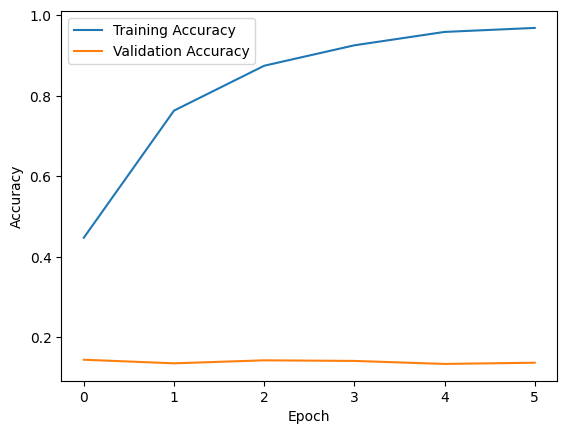

In [ ]:


import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Train"
test_path = "/content/Freshwater Fish Disease Aquaculture in south asia/Test"

# Parameters
image_size = (224, 224)
batch_size = 32
epochs = 10
learning_rate = 0.0001

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Unfreeze some layers
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Add custom classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(7, activation='softmax')(x)  # Assuming 6 disease classes

# Create model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[lr_scheduler, early_stopping]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
final_accuracy = history.history['accuracy'][-1]
print("Accuracy after training: {:.2f}%".format(final_accuracy * 100))

Accuracy after training: 96.79%


In [ ]:
# Save the model to HDF5 file
model.save("your_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on test data
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)

# Get true labels
true_labels = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_labels, y_pred_classes, target_names=class_names))


22/22 [==============================] - 5s 186ms/step
Accuracy: 0.14347202295552366
Classification Report:
                                   precision    recall  f1-score   support

            Bacterial Red disease       0.00      0.00      0.00       100
Bacterial diseases - Aeromoniasis       0.00      0.00      0.00       100
           Bacterial gill disease       0.00      0.00      0.00       100
   Fungal diseases Saprolegniasis       0.14      1.00      0.25       100
                     Healthy Fish       0.00      0.00      0.00       100
               Parasitic diseases       0.00      0.00      0.00       100
Viral diseases White tail disease       0.00      0.00      0.00        97

                         accuracy                           0.14       697
                        macro avg       0.02      0.14      0.04       697
                     weighted avg       0.02      0.14      0.04       697



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


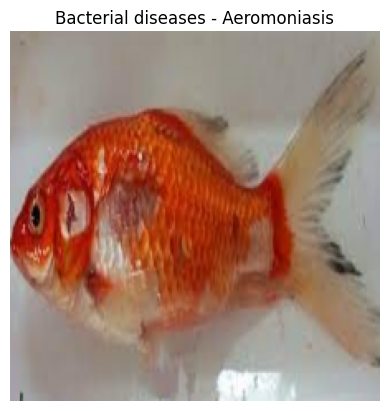

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Select a random fish image file from the training dataset
fish_class = random.choice(os.listdir(train_path))
fish_image_file = random.choice(os.listdir(os.path.join(train_path, fish_class)))

# Load and display the image with improved quality
img_path = os.path.join(train_path, fish_class, fish_image_file)
img = image.load_img(img_path, target_size=image_size, interpolation='bicubic')  # Set interpolation='bicubic' for better quality
plt.imshow(img)
plt.title(fish_class)
plt.axis('off')
plt.show()
